In [1]:
from IPython.display import display
from IPython.core.display import HTML
display(HTML("<style>.container { width:100% ! important; }</style>"))

import numpy as np
import gzip
from six.moves import cPickle
from scipy import ndimage
import matplotlib.pyplot as plt 

In [2]:
def plot_MNIST(X_i):
    Ximag_i = (np.reshape(X_i, (28, 28)) * 255).astype(np.uint8)
    plt.figure()
    plt.imshow(Ximag_i, interpolation='None', cmap='gray')
    plt.xlim(0,28)
    plt.ylim(0,28)

In [3]:
def rotate_MNIST(X_):
    X_imag_ = np.reshape(X_, (-1, 28,28))
    X_imag_rotated_ = np.zeros((70000, 28, 28))
    
    for i in range(70000):
        angle = np.random.randint(-45,45)
        X_imag_rotated_[i] = ndimage.rotate(X_imag_[i], angle, cval=0, order=0, reshape=False)
        
    X_rotated_ = np.reshape(X_imag_rotated_, (70000,-1))
    
    return X_rotated_  

In [16]:
def noise_MNIST(X_):    
    noise = np.random.uniform(0, 1, size = (70000, 784) )
    X_noised_ = X_ + noise
    X_noised_ = np.minimum(X_noised_, 1)     
    return X_noised_   

In [5]:
(x_train, y_train), (x_test, y_test) = cPickle.load(gzip.open('MNIST_dataset/mnist.pkl.gz', 'rb'), encoding="bytes")

# normalize data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# flatten data
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# test + train data will be used for unsupervised clusterting
X = np.concatenate((x_train,x_test))
Y = np.concatenate((y_train,y_test))

In [14]:
X_rotated = rotate_MNIST(X)
X_noised = noise_MNIST(X)

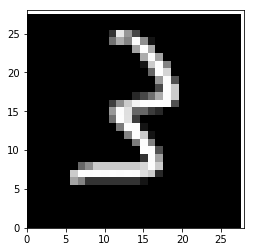

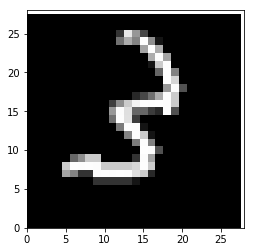

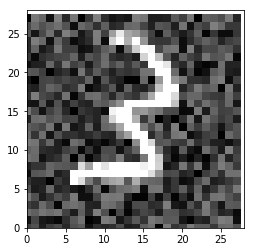

In [15]:
plot_MNIST(X[44])
plot_MNIST(X_rotated[44])
plot_MNIST(X_noised[44])